Skew-T Analysis
===============

Create a Skew-T plot using remote data from University of Wyoming.

This example uses example data from the University of Wyoming sounding
archive for 12 UTC 31 October 2016 for Minneapolis, MN (MPX).

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

## Obtain Data and Format

This requires an internet connection to access the sounding data from a
remote server at the University of Wyoming. <br>

First we will create variables for date, time and station. <br>
Format: `datetime(YYYY, MM, DD, HH)` <br>

The `station` entry will need the be the three letter identifier of the station you want to look at. The National Center for Atmospheric Research (NCAR) [Research Applications Labratory](https://ral.ucar.edu) (RAL) continously updates a [detailed list of all stations](https://weather.rap.ucar.edu/surface/stations.txt). 

In [2]:
# Create variables for preferred date, time and station
preferred_date = datetime(2016, 10, 26, 12)
station = 'MPX'

In [3]:
# Read remote sounding data based on preferred_date and station
sounding_data = WyomingUpperAir.request_data(preferred_date, station)

In [4]:
sounding_data

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,984.0,287,6.6,6.2,105.0,3.0,-2.897777,0.776457,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
1,979.0,329,6.4,5.4,105.0,6.0,-5.795555,1.552914,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
2,946.3,610,4.6,4.0,105.0,23.0,-22.216294,5.952838,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
3,925.0,798,3.4,3.0,115.0,25.0,-22.657695,10.565457,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
4,911.8,914,2.8,2.4,120.0,27.0,-23.382686,13.500000,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,20.0,26230,-55.9,-69.9,260.0,20.0,19.696155,3.472964,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
124,19.5,26391,-55.1,-70.1,262.0,20.0,19.805361,2.783462,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
125,16.6,27432,-57.1,-69.7,275.0,23.0,22.912478,-2.004582,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32
126,15.0,28042,-58.3,-69.5,290.0,22.0,20.673238,-7.524443,MPX,72649,2016-10-26 12:00:00,44.85,-93.56,287.0,24.32


## Assign Units

We will pull the data out of the example dataset into individual variables and assign units. This is explained in further detain in the Simple Sounding notebook and in the [Metpy documentation](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html).


In [5]:
pres = sounding_data['pressure'].values * units.hPa
temp = sounding_data['temperature'].values * units.degC
dewpoint = sounding_data['dewpoint'].values * units.degC
wind_speed = sounding_data['speed'].values * units.knots
wind_dir = sounding_data['direction'].values * units.degrees
u = sounding_data['u_wind'].values * units.knots
v = sounding_data['v_wind'].values * units.knots

## Create Sounding Plot

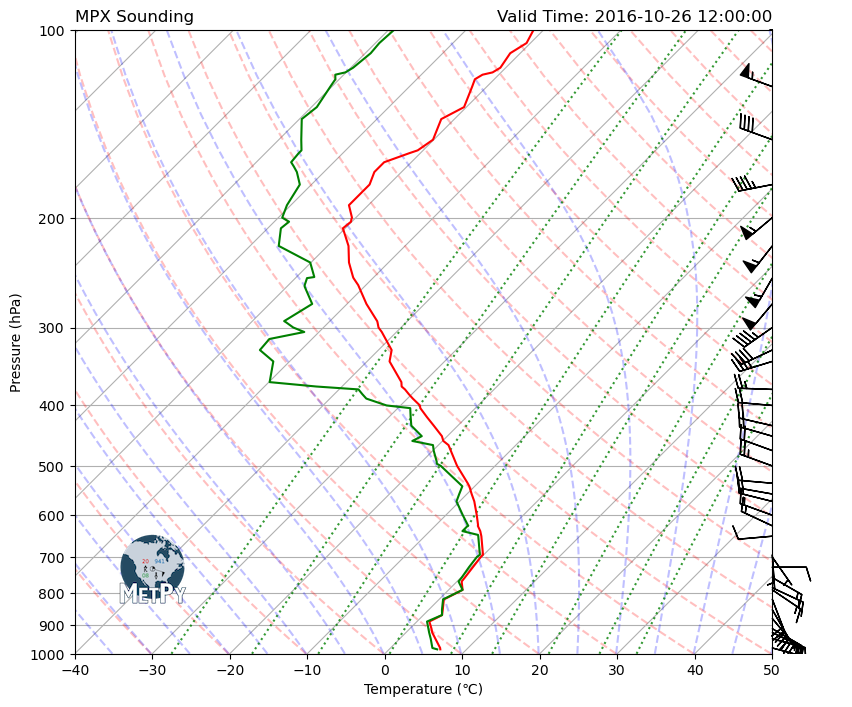

In [6]:
# Create figure and set size
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint lines
skew.plot(pres, temp, 'red')
skew.plot(pres, dewpoint, 'green')

# Plot wind barbs
my_interval = np.arange(100, 1000, 25) * units('hPa')
ix = mpcalc.resample_nn_1d(pres, my_interval)
skew.plot_barbs(pres[ix], u[ix], v[ix], y_clip_radius=0.001)

# Improve labels and set axis limits
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K, alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K, alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -25) * units.hPa, linestyle='dotted', color='tab:blue')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 115, 100, size='small');

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(preferred_date), loc='right');